# Plot Data cdg dynamics Pseudomonas aeruginosa

---

## Import packages

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(7,9))

import seaborn as sns
import pathlib

plt.rcParams.update({'font.size': 9})
sns.set(font="Arial")

---

## Load Data

We load the data created with the `1_filter_data_Pa` notebook.

In [2]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas')
image_dir = proj_dir / 'figures_Pa'

#load data frame
df_name = pathlib.Path() / 'data_files' / 'filtered_data_Pa.csv'
df = pd.read_csv(df_name, index_col=0)
df.reset_index(drop=True)

#add time in minutes
df['time since birth [min]'] = df['age'] * 5
df['cdg ratio'] = df['rel_cdg_hl'] #rename column

---

## Line plot of absolute CDG levels 

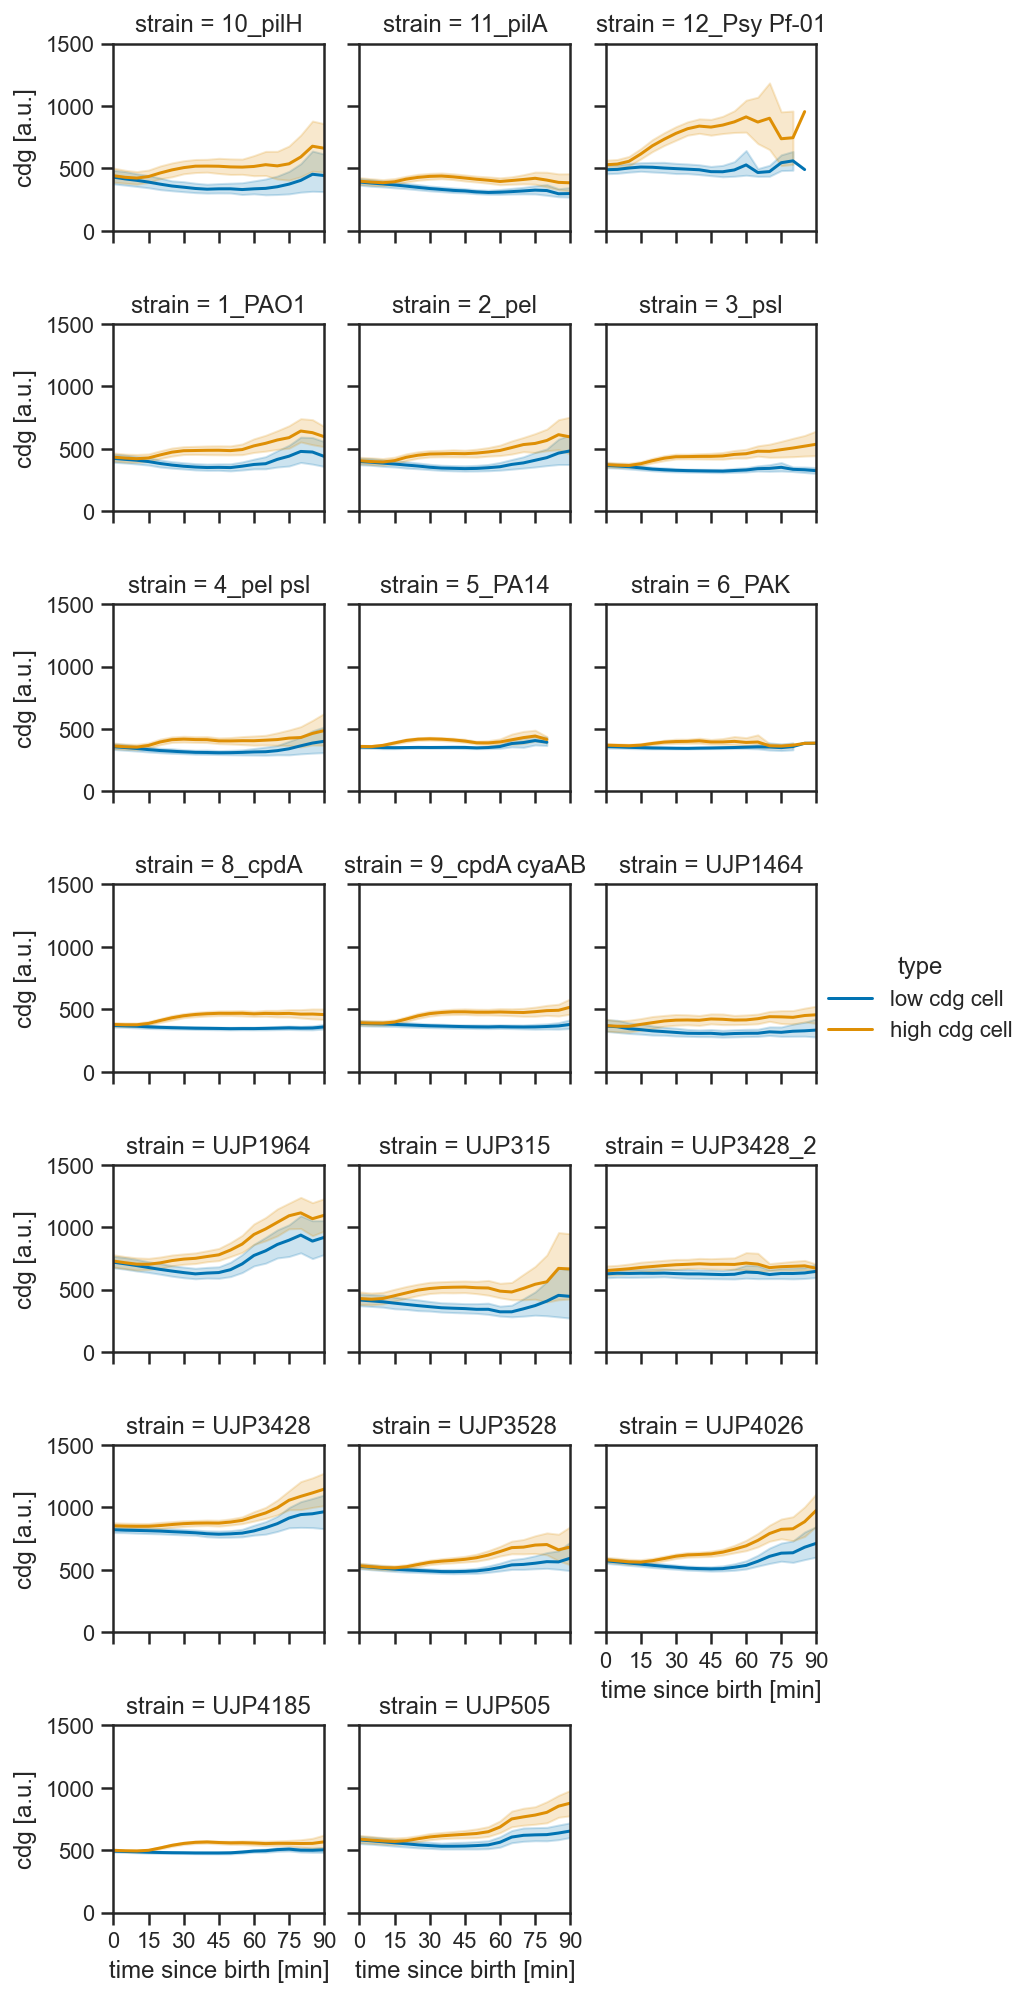

In [3]:
sns.set_style("ticks")

#restructure data frame in long format, adding cdg-type as categorical class variable 
df1 = df[['strain','time since birth [min]','cdg_dh']].copy()
df1['type'] = 'high cdg cell'
df1['cdg [a.u.]'] = df1['cdg_dh']

df2 = df[['strain','time since birth [min]','cdg_dl']].copy()
df2['type'] = 'low cdg cell'
df2['cdg [a.u.]'] = df2['cdg_dl']

df_hvl = pd.concat((df1, df2),keys=['strain','time since birth [min]','cdg','type']).reset_index()

#create grid by strain
g = sns.FacetGrid(data=df_hvl, col="strain", hue='type', 
                  col_wrap=3, height=2, 
                  aspect=1, xlim=(0,90), ylim=(0,1500),
                  palette="colorblind", 
                  hue_order=['low cdg cell', 'high cdg cell'],
                  despine=False)

# Draw a line plot of cdg levels
g.map(sns.lineplot, "time since birth [min]", "cdg [a.u.]")

# Adjust the arrangement of the plots
g.fig.tight_layout(w_pad=1)
g.set(xticks=[0,15,30,45,60,75,90],yticks=[0,500,1000,1500])
g.add_legend()

im_name = image_dir / 'cdg_absolute_levels_Pa.svg'
g.savefig(im_name)

---

## Box plot absolute levels

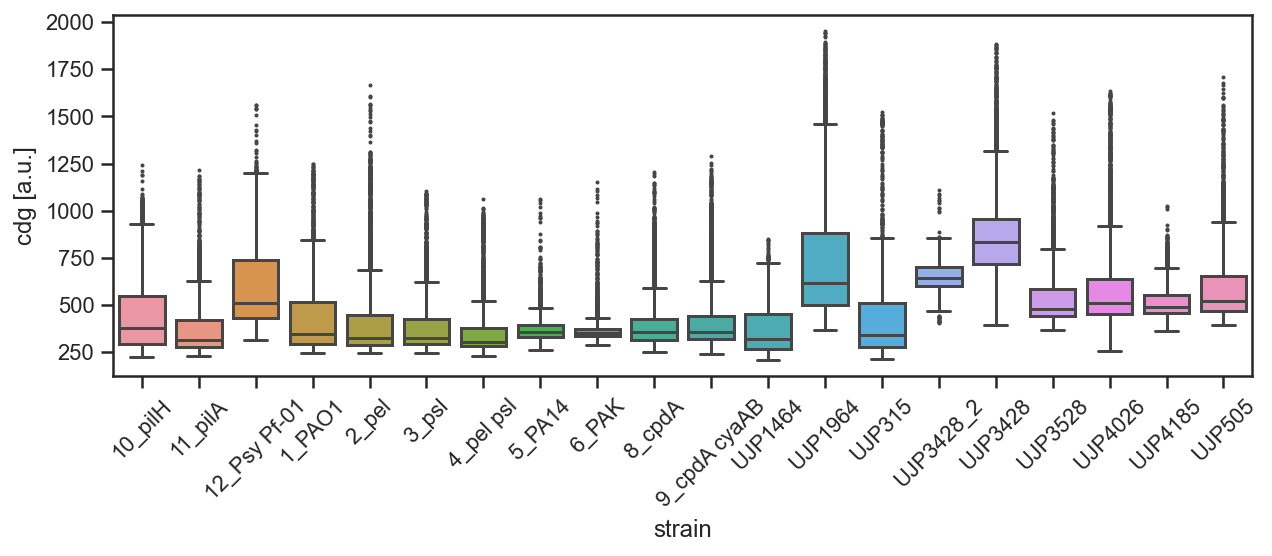

In [7]:
fig, axs = plt.subplots(figsize=(9,4))
flierprops = dict(markersize=1, linestyle='none', marker='o')
g = sns.boxplot(ax=axs, data=df_hvl, x='strain',y='cdg [a.u.]',flierprops=flierprops)
im_name = image_dir / 'abs_cdg_levels_per_strain_Pa.svg'
plt.xticks(rotation=45)
plt.tight_layout(w_pad=1)

g.get_figure().savefig(im_name)